# Ergodic Markov Chain

Ergodic chains consist of transient states. As the chain runs, the probability of being in any of the states becomes fixed, $\Pi(\infty)$. The objective of this notebook is to calculate this distribution of probabilities,called the steady state, equilibrium probabilities, by several means: exact calculation, the "matrix multiplication" scheme, and simulations.
This notebook will focus on a simple ergodic markov chain with three states for demonstration. 

## Transition Matrix

The transition matrix for the ergodic chain with three states is $M_{ergodic}$. 

$$M_{ergodic} = \begin{bmatrix} m_{11} & m_{12} & m_{13} \\ m_{21} & m_{22} & m_{23} \\ m_{31} & m_{32} & m_{33} \end{bmatrix} = \begin{bmatrix} 0.3 & 0.2 & 0.5 \\ 0.4 & 0.1 & 0.5 \\ 0.3 & 0.6 & 0.1 \end{bmatrix}$$


This matrix describes the probability of going to any state given the current state. For example, if in state $2$, the probability of going to state $3$ is $m_{23}=0.5$.

## State Occupation Probability

The state occupation probability at time zero is denoted $\Pi(0)$, and this is a vector of the probabilities of being in any particular state at time $0$. This vector could be $\Pi(0)=\begin{bmatrix} 1 & 0 & 0 \end{bmatrix}^T$, corresponding to starting in state $1$. This vector could also be a probability vector of the chance of starting in any of the states, for example a uniform starting probability vector: $\Pi(0)=\begin{bmatrix} 1/3 & 1/3 & 1/3 \end{bmatrix}^T$. 

To determine the probability of transitioning to each state after one step of the chain has been made, this will be determined by the state it is currently in, defined by $\Pi(0)$, and the transition probabilities from the current state. To calculate the state occupation probability vector at step 1, the equation is $\Pi(1)= M_{ergodic}^T \Pi(0)$.

This can be seen easily extend to a recurisve equation that will enable calculating the state occupation probability vector at any time $n$ based on the probability vector from the previous time step $n-1$, the equation is: $\Pi(n)= M_{ergodic}^T \Pi(n-1)$. This can therefore be used to calculate the probability vector at any time, given the vector at time $0$ : $\Pi(n)= (M_{ergodic}^T)^n \Pi(0)$.

As the number of time steps approaches infinity, the equation becomes: $\Pi(\infty)= (M_{ergodic}^T) \Pi(\infty)$, where the probability state vector converges to the "stationary state". This Stationary state probability vector can be seen as the eigenvector corresponding to eigenvalue of $\lambda=1$ of the transition matrix.

Therfore, two ways to calculate this stationary state vector are:

* find the eigenvalues of the transition matrix, and the corresponding eigenvector
* approximate the transition matrix at $(M_{ergodic}^T)^{\infty}$ to compute the stationary state based on $\Pi(0)$

These two approaches will be calculated. Then the markov chain will be simulated and run for many iterations, and the final state counts will be used as a way to calculate the approximate stationary state distribution.

### Exact Calculation of Equilibrium Probabilities

The exact probabilities of the stationary (equilibrium) state are given by the equation $\Pi(\infty) = M_{ergodic}^T\Pi(\infty)$. Therefore, the stationary state probability vector can be interpreted as the eigenvector corresponding to the eigenvalue of the transition matrix $M_{ergodic}^T$ with the eignevalue $\lambda = 1$. The equation for eigenvectors is $Av=\lambda v$ where $A$ is a matrix, $v$ is a vector (the eigenvector), and $\lambda$ is a scalar caled the eigenvalue. Therefore, to find the stationary state probability vector, the eigenvectors must be found, and the vector associated with eigenvalue of $\lambda=1$ will be the probabilities of each state being occupied as the chain continues to run towards infinity.

The computation of the eigenvectors and values is shown in the following code.

In [34]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
Mergodic = np.matrix([[0.3, 0.2, 0.5], [0.4, 0.1, 0.5], [0.3, 0.6, 0.1]])
eigenvalues, eigenvectors = np.linalg.eig(Mergodic.T)

# confirm that there is an eigenvalue equal to 1
eigenvalues

array([ 1. , -0.1, -0.4])

In [3]:
# get the corresponding eigenvector as the stationary state vector
err_tol = 1e-9
if (abs(max(eigenvalues)-1)< err_tol):
    stationarystate= eigenvectors[:,np.where(abs(eigenvalues[0]-1)< err_tol)]
else:
    stationarystate=np.zeros(len(eigenvalues))
    print("highest eigenvalue not close to 1"+str(max(eigenvalues)))
print(str(stationarystate)) # view the stationary state vector

[[[-0.57270844]]

 [[-0.53901971]]

 [[-0.61762675]]]


In [4]:
# confirm that this is an eigenvector with eigevalue 1 : dot(M, v) = v
np.dot(Mergodic.T, np.squeeze(np.asarray(stationarystate)))

matrix([[-0.57270844, -0.53901971, -0.61762675]])

In [5]:
stationarystatenorm = np.squeeze(np.asarray(stationarystate))/sum(stationarystate).item(0)
stationarystatenorm

array([ 0.33116883,  0.31168831,  0.35714286])

### Matrix Multiplication

The stationary state can also be calculate by approximating $(M_{ergodic}^T)^{\infty}$, as will be shown in the following code.

In [6]:
Minfty = (Mergodic.T)**64

# view the results
Minfty

matrix([[ 0.33116883,  0.33116883,  0.33116883],
        [ 0.31168831,  0.31168831,  0.31168831],
        [ 0.35714286,  0.35714286,  0.35714286]])

The stationary state will be the same regardless of the starting vector, as shown in the following code. This result also agrees with the vector previously calculated from the eigenvector approach.

In [7]:
print("starting state = 1, stationary state= " +str(np.dot(Minfty, [1,0,0])))
print("starting state = 2, stationary state= " +str(np.dot(Minfty, [0,1,0])))
print("starting state = 3, stationary state= " +str(np.dot(Minfty, [0,0,1])))
print("stationary state from eigenvector = " + str(stationarystatenorm))

starting state = 1, stationary state= [[ 0.33116883  0.31168831  0.35714286]]
starting state = 2, stationary state= [[ 0.33116883  0.31168831  0.35714286]]
starting state = 3, stationary state= [[ 0.33116883  0.31168831  0.35714286]]
stationary state from eigenvector = [ 0.33116883  0.31168831  0.35714286]


## Simulations

The calculated results will now be compared with results from simulations. Experiments will be run with different starting states, and the chains will run until the approach steady state. The number of counts for being in each state across all the experiments will be used to calculate the stationary state distribution.

In [8]:
# initialize the vector to determine the chance of being in a given state at time 0
numstates = 3
initdist= [1/2, 1/4, 1/4]

# use this distribution to choose the starting state:
startstate= np.random.choice(a= list(range(numstates)), p=np.squeeze(np.asarray(initdist)))+1
startstate

1

In [19]:
# set number of experiments and number of iterations for the markov chain:
numexp = 100
numiter = 10000
np.random.seed(100)
# matrix to store the state at each iteration of the markov chain
statemat = np.zeros((numexp, numiter))
startstates = np.zeros(numexp)

In [20]:
for exp in range(numexp):
    # choose start state for this experiment:
    currstate= np.random.choice(a= list(range(numstates)), p=np.squeeze(np.asarray(initdist)))+1
    startstates[exp] = currstate
    # iterate around the markov chain 10000 times
    for niter in range(numiter):
        statevec = np.zeros((numstates,1))
        statevec[currstate-1]=1
        statetransprobs = np.dot(Mergodic.T, statevec)
        currstate = np.random.choice(a= list(range(numstates)), p=np.squeeze(np.asarray(statetransprobs)))+1
        statemat[exp, niter]= currstate
        
        

### Check when the simulation converges

In [94]:
timecountspi1=[(np.unique(statemat[:,i], return_counts=True)[1])[0]/numexp for i in range(0, numiter)]
timeavg=[]
for time in range(0, (numiter-100)): # up to the last 1000
    timeavg.append(sum(timecountspi1[time:])/(numiter-time))

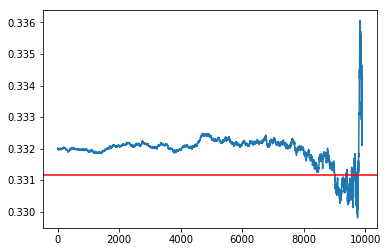

In [95]:
plt.plot(timeavg)
plt.axhline(y=stationarystatenorm[0], color='r')
plt.show()

Checking the plot for $\Pi_1$, the true value from direct calculation is shown in the red line. The simulation results is shown as the cumulative time average (the blue line). For example, on the plot at $x=2000$, this means starting from time 2000, all the following state values were used to calculate the average across the time points 2000 to 10000, and the average calculated is shown on the graph to be approximately 0.332. This plot shows that the simulation result approaches the real $\Pi$ value around time 9000, before the values start having a much higher variance due to fewer samples being included in the average. Based on this, time 9000 was chosen as the starting point to calculate the simulate time and ensemble average approximation of $\Pi$. The result of this is shown in the following code.

In [89]:
# count the total number of states in the full matrix, to approximate steady state counts
unique, counts = np.unique(statemat[:,9000:], return_counts=True)
counts/np.product(statemat[:,9000:].shape)

array([ 0.33125,  0.31147,  0.35728])

In [22]:
# confirm the final result is the same as the previous caluated values
print("starting state = 1, stationary state= " +str(np.dot(Minfty, [1,0,0])))
print("starting state = 2, stationary state= " +str(np.dot(Minfty, [0,1,0])))
print("starting state = 3, stationary state= " +str(np.dot(Minfty, [0,0,1])))
print("stationary state from eigenvector = " + str(stationarystatenorm))
print("stationary state from simulatons: " + str(counts/np.product(statemat.shape)))

starting state = 1, stationary state= [[ 0.33116883  0.31168831  0.35714286]]
starting state = 2, stationary state= [[ 0.33116883  0.31168831  0.35714286]]
starting state = 3, stationary state= [[ 0.33116883  0.31168831  0.35714286]]
stationary state from eigenvector = [ 0.33116883  0.31168831  0.35714286]
stationary state from simulatons: [ 0.033125  0.031147  0.035728]


In [13]:
# check the start state distribution is close to the set starting state dist
unique, counts = np.unique(startstates, return_counts=True)
counts/np.product(statemat.shape[0])
print(" start state distribution is: " +str(initdist) + "\n simulated start state distribution is: " +str(counts/np.product(statemat.shape[0])))

 start state distribution is: [0.5, 0.25, 0.25]
 simulated start state distribution is: [ 0.56  0.25  0.19]


## Test addition example transition matrices

The same code above will be run on more examples.

In [14]:
from ergodic import test_ergodic


In [15]:
testmat1 = np.matrix([[0.3, 0.4, 0.3], [0.3, 0.4, 0.3], [0.3, 0.4, 0.3]])
test_ergodic(testmat1)

Eigenvalue approach, eigenvalues:  [  1.00000000e+00  -3.12336594e-18   2.49286727e-17]
stationary state from eigenvector = [ 0.3  0.4  0.3]
from matrix multiplication, stationary state= [[ 0.3]
 [ 0.4]
 [ 0.3]]
stationary state from simulatons: [ 0.30032  0.3998   0.29988]


In [16]:
testmat2 = np.matrix([[0.3, 0.3, 0.2, 0.2], [0.4, 0.3, 0.2, 0.1], [0.3, 0.1, 0.2, 0.4], [0.1, 0.1, 0.1, 0.7]])
test_ergodic(testmat2)

Eigenvalue approach, eigenvalues:  [ 1.          0.4917286  -0.05977352  0.06804492]
stationary state from eigenvector = [ 0.23306773  0.18326693  0.15737052  0.42629482]
from matrix multiplication, stationary state= [[ 0.23306773]
 [ 0.18326693]
 [ 0.15737052]
 [ 0.42629482]]
stationary state from simulatons: [ 0.23375  0.18254  0.15708  0.42663]


In [17]:
testmat3 = np.matrix([[0.1, 0.1, 0.8], [0.04, 0.01, 0.95], [0.49, 0.5, 0.01]])
test_ergodic(testmat3)

Eigenvalue approach, eigenvalues:  [ 1.         -0.01279981 -0.86720019]
stationary state from eigenvector = [ 0.26709323  0.26386759  0.46903918]
from matrix multiplication, stationary state= [[ 0.26712278]
 [ 0.26389893]
 [ 0.46897828]]
stationary state from simulatons: [ 0.26762  0.26362  0.46876]


In [18]:
testmat4 = np.matrix([[0.1, 0.9], [0.04, 0.96]])
test_ergodic(testmat4)

Eigenvalue approach, eigenvalues:  [ 0.06  1.  ]
stationary state from eigenvector = [ 0.04255319  0.95744681]
from matrix multiplication, stationary state= [[ 0.04255319]
 [ 0.95744681]]
stationary state from simulatons: [ 0.04315  0.95685]
